# Analysis of Video Games Sales and Reviews 

Importing the dataset and necessary libraries 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('video_games_sales2025.csv')

Initial exploration

In [30]:
df.head(5) # First 5 rows
df.tail(5) # Last 5 rows

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
89613,2115110,Outrun Them,2024-02-29,0,3.99,0,The name of the game is literally the game. Ou...,The name of the game is literally the game. Ou...,It's all in the name.. outrun them.,NaN,...,0,0,0,0,0,"{'2D Platformer': 91, 'Runner': 85, 'Platforme...",-1,-1,-1,-1
89614,1174200,Lands of Pharaoh: Episode 1,2020-01-07,0,10.00,0,Join Our Discord Channel About the Game Briefl...,Briefly: Lands of Pharaoh is a third person vi...,Lands of Pharaoh is a multi-camera-angle based...,NaN,...,0,0,0,0,0,"{'Action': 43, 'Adventure': 41, 'Indie': 41, '...",-1,-1,-1,-1
89615,1160190,Player One,2019-10-10,0,1.99,0,Player One is a new 3D game where you take con...,Player One is a new 3D game where you take con...,"3D Game, Thirdperson Platformer",NaN,...,0,0,0,0,0,"{'Indie': 31, 'Early Access': 21}",-1,-1,-1,-1
89616,3380340,DragonRoad,2025-01-25,0,29.99,0,"This is an open world game on 3D, also a m...","This is an open world game on 3D, also a m...","This is an open world game on 3D, Also a missi...",NaN,...,0,0,0,0,0,"{'RPG': 117, 'Action-Adventure': 111, 'Strateg...",-1,-1,-1,-1
89617,763730,Ragtag Adventurers,2018-03-01,0,9.99,0,Ragtag Adventurers is a Boss Rush game that pi...,Ragtag Adventurers is a Boss Rush game that pi...,Ragtag Adventurers is a boss rush game that pi...,NaN,...,0,0,0,0,0,"{'Action': 22, 'Indie': 21}",-1,-1,-1,-1


In [29]:
df.info() # Basic info
df.describe(include='all') # Statistical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   required_age              89618 non-null  int64  
 4   price                     89618 non-null  float64
 5   dlc_count                 89618 non-null  int64  
 6   detailed_description      89421 non-null  object 
 7   about_the_game            89398 non-null  object 
 8   short_description         89498 non-null  object 
 9   reviews                   10401 non-null  object 
 10  header_image              89618 non-null  object 
 11  website                   41114 non-null  object 
 12  support_url               44110 non-null  object 
 13  support_email             78798 non-null  object 
 14  window

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,8.961800e+04,89618,89618,89618.000000,89618.000000,89618.000000,89421,89398,89498,10401,...,89618.000000,8.961800e+04,89618.000000,89618.000000,8.961800e+04,89618,89618.000000,8.961800e+04,89618.000000,89618.000000
unique,NaN,88899,4459,NaN,NaN,NaN,89075,89040,88586,10291,...,NaN,NaN,NaN,NaN,NaN,70420,NaN,NaN,NaN,NaN
top,NaN,Alone,2024-10-31,NaN,NaN,NaN,Help the beautiful girls to immerse themselves...,Help the beautiful girls to immerse themselves...,Find the objects that are hidden on the map.,“ ” Read more on PC Gamer,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
freq,NaN,6,141,NaN,NaN,NaN,58,58,50,21,...,NaN,NaN,NaN,NaN,NaN,16872,NaN,NaN,NaN,NaN
mean,1.656904e+06,NaN,NaN,0.183624,7.309623,0.595583,NaN,NaN,NaN,NaN,...,5.032694,1.147559e+02,5.301814,4.558627,9.833994e+01,NaN,45.352418,1.315490e+03,5.231639,15.584581
std,9.168390e+05,NaN,NaN,1.725594,13.331073,15.351920,NaN,NaN,NaN,NaN,...,181.100334,8.806711e+03,189.591095,16.538036,5.717544e+03,NaN,40.685695,3.542370e+04,22.335358,444.277307
min,2.000000e+01,NaN,NaN,-1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,8.550525e+05,NaN,NaN,0.000000,0.990000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.524730e+06,NaN,NaN,0.000000,4.990000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,60.000000,1.500000e+01,-1.000000,-1.000000
75%,2.430852e+06,NaN,NaN,0.000000,9.990000,0.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,NaN,84.000000,8.100000e+01,-1.000000,-1.000000


#### Data Preprocessing

In [42]:
# NORMALIZE COLUMN NAMES 
orig_cols = df.columns.tolist()
clean_cols = {}

for c in orig_cols:
    c_new = c.strip()
    c_new = c_new.replace("(in $)","").replace("(support: TRUE or FALSE values)","")
    c_new = c_new.replace(" ", "_").replace("-", "_").replace("(","").replace(")","")
    c_new = c_new.replace("/", "_").replace("__","_")
    c_new = c_new.lower()
    clean_cols[c] = c_new

df = df.rename(columns=clean_cols)

# Additional known name corrections
rename_map = {
    "reccomendations": "recommendations",
    "num_revirews_recent": "num_reviews_recent",
    "estimated_owner": "estimated_owners",
    "estimated_owners": "estimated_owners",
}
df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns}, inplace=True)

print("Cleaned Columns:", df.columns.tolist())


Cleaned Columns: ['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count', 'detailed_description', 'about_the_game', 'short_description', 'reviews', 'header_image', 'website', 'support_url', 'support_email', 'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url', 'achievements', 'recommendations', 'notes', 'supported_languages', 'full_audio_languages', 'packages', 'developers', 'publishers', 'categories', 'genres', 'screenshots', 'movies', 'user_score', 'score_rank', 'positive', 'negative', 'estimated_owners', 'average_playtime_forever', 'average_playtime_2weeks', 'median_playtime_forever', 'median_playtime_2weeks', 'discount', 'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total', 'pct_pos_recent', 'num_reviews_recent', 'year', 'min_owners', 'max_owners', 'avg_owners', 'rating', 'price_usd', 'windows_support', 'mac_support', 'linux_support', 'price_bin', 'dlc_bin', 'decade', 'mostly_positive', 'owners_per_dollar', 'playtime_per_dollar', 'genres_list']


In [ ]:
# Detect important columns

col_map = {
    "game_name": next((c for c in df.columns if c=="name" or ("game" in c and "name" in c)), None),
    "release_date": next((c for c in df.columns if "release" in c and "date" in c), None),
    "required_age": next((c for c in df.columns if "required_age" in c), None),
    "price": next((c for c in df.columns if c=="price" or "price" in c), None),
    "dlc_count": next((c for c in df.columns if "dlc" in c and "count" in c), None),
    "metacritic_score": next((c for c in df.columns if "metacritic" in c), None),
    "achievements": next((c for c in df.columns if "achievement" in c), None),
    "developer": next((c for c in df.columns if "developer" in c), None),
    "publisher": next((c for c in df.columns if "publisher" in c), None),
    "categories": next((c for c in df.columns if "category" in c), None),
    "genres": next((c for c in df.columns if "genre" in c), None),
    "positive": next((c for c in df.columns if c=="positive" or "positive" in c), None),
    "negative": next((c for c in df.columns if c=="negative" or "negative" in c), None),
    "estimated_owners": next((c for c in df.columns if "estimated_owner" in c or "estimated_owners" in c), None),
    "avg_playtime": next((c for c in df.columns if "average_playtime" in c or "avg_playtime" in c), None),
    "median_playtime": next((c for c in df.columns if "median_playtime" in c), None),
    "peak_ccu": next((c for c in df.columns if "peak" in c and "ccu" in c), None),
    "pct_pos_total": next((c for c in df.columns if "pct_pos_total" in c), None),
    "num_reviews_total": next((c for c in df.columns if "num_reviews_total" in c or ("num" in c and "total" in c)), None),
    "pct_pos_recent": next((c for c in df.columns if "pct_pos_recent" in c), None),
    "num_reviews_recent": next((c for c in df.columns if "num_reviews_recent" in c or "num_revirews_recent" in c), None),
    "windows": next((c for c in df.columns if c.startswith("windows") or c=="windows"), None),
    "mac": next((c for c in df.columns if "mac"==c or c.startswith("mac")), None),
    "linux": next((c for c in df.columns if "linux"==c or c.startswith("linux")), None)
}

print("Detected Columns:")
for k,v in col_map.items():
    print(f"{k}: {v}")


Detected Columns:
game_name: None
release_date: release_date
required_age: required_age
price: price
dlc_count: dlc_count
metacritic_score: metacritic_score
achievements: achievements
developer: developers
publisher: publishers
categories: None
genres: genres
positive: positive
negative: negative
estimated_owners: estimated_owners
avg_playtime: average_playtime_forever
median_playtime: median_playtime_forever
peak_ccu: peak_ccu
pct_pos_total: pct_pos_total
num_reviews_total: num_reviews_total
pct_pos_recent: pct_pos_recent
num_reviews_recent: num_reviews_recent
windows: windows
mac: mac
linux: linux


In [33]:
# Converting release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

df[['min_owners','max_owners']] = (
    df['estimated_owners']
      .str.replace(',', '')             # remove commas
      .str.split('-', expand=True)      # split into two columns
      .astype(int))

df['avg_owners'] = (df['min_owners'] + df['max_owners']) / 2

# Create rating ratio
df['rating'] = df['positive'] / (df['positive'] + df['negative'])
df['rating'] = df['rating'].fillna(0)


Data cleaning

In [34]:
# Clean a& Convert columns

# Release date → datetime → year
if col_map["release_date"]:
    df[col_map["release_date"]] = pd.to_datetime(df[col_map["release_date"]], errors='coerce')
    df['year'] = df[col_map["release_date"]].dt.year
else:
    df['year'] = np.nan

# Price parsing
def parse_price(x):
    try:
        if pd.isna(x):
            return np.nan
        s = str(x).lower().strip()
        if s in ("free","0","none","nan"):
            return 0.0
        s = s.replace("$","").replace(",","").replace("usd","").strip()
        return float(s)
    except:
        return np.nan

df['price_usd'] = df[col_map["price"]].apply(parse_price) if col_map["price"] else np.nan

# Convert review columns
for col in ("positive","negative"):
    if col_map[col]:
        df[col] = pd.to_numeric(df[col_map[col]], errors='coerce')
    else:
        df[col] = np.nan

# Total reviews
if col_map["num_reviews_total"]:
    df['num_reviews_total'] = pd.to_numeric(df[col_map["num_reviews_total"]], errors='coerce')
else:
    df['num_reviews_total'] = df['positive'].fillna(0) + df['negative'].fillna(0)

# Recent reviews
if col_map["num_reviews_recent"]:
    df['num_reviews_recent'] = pd.to_numeric(df[col_map["num_reviews_recent"]], errors='coerce')
else:
    df['num_reviews_recent'] = np.nan

# pct_pos_total
if col_map["pct_pos_total"]:
    df['pct_pos_total'] = pd.to_numeric(df[col_map["pct_pos_total"]], errors='coerce')
else:
    df['pct_pos_total'] = (df['positive'] / df['num_reviews_total']).replace([np.inf,-np.inf],np.nan).fillna(0)*100

# pct_pos_recent
if col_map["pct_pos_recent"]:
    df['pct_pos_recent'] = pd.to_numeric(df[col_map["pct_pos_recent"]], errors='coerce')
else:
    df['pct_pos_recent'] = np.nan

# Estimated owners
df['estimated_owners'] = pd.to_numeric(df[col_map["estimated_owners"]], errors='coerce') if col_map["estimated_owners"] else np.nan

# Metacritic
df['metacritic_score'] = pd.to_numeric(df[col_map["metacritic_score"]], errors='coerce') if col_map["metacritic_score"] else np.nan

# Platform booleans
df['windows_support'] = df[col_map["windows"]].astype(str).str.lower().isin(["true","1","yes","y"]) if col_map["windows"] else False
df['mac_support'] = df[col_map["mac"]].astype(str).str.lower().isin(["true","1","yes","y"]) if col_map["mac"] else False
df['linux_support'] = df[col_map["linux"]].astype(str).str.lower().isin(["true","1","yes","y"]) if col_map["linux"] else False

# Playtime
df['average_playtime_forever'] = pd.to_numeric(df[col_map["avg_playtime"]], errors='coerce') if col_map["avg_playtime"] else np.nan
df['median_playtime_forever'] = pd.to_numeric(df[col_map["median_playtime"]], errors='coerce') if col_map["median_playtime"] else np.nan

df.drop_duplicates(inplace=True)
print("Shape after parsing:", df.shape)


Shape after parsing: (89618, 56)


Data Binning

In [35]:
# Price bins
price_series = df['price_usd']

if price_series.dropna().shape[0] < 10:
    df['price_bin'] = pd.cut(price_series.fillna(0), bins=[-1,0,10,30,60,100,1000],
        labels=['Free','<=10','10-30','30-60','60-100','>100'])
else:
    try:
        df['price_bin'] = pd.qcut(price_series, [0,0.25,0.5,0.75,0.95,1.0],
            labels=['Q1','Q2','Q3','Q4','Top5%'])
    except:
        df['price_bin'] = pd.cut(price_series.fillna(0), bins=[-1,0,10,30,60,100,1000],
            labels=['Free','<=10','10-30','30-60','60-100','>100'])

# DLC bins
df['dlc_count'] = pd.to_numeric(df[col_map["dlc_count"]], errors='coerce').fillna(0).astype(int) if col_map["dlc_count"] else 0
df['dlc_bin'] = pd.cut(df['dlc_count'], [-1,0,2,5,20,500],
                       labels=['No DLC','1-2','3-5','6-20','20+'])

# Year to decade
df['decade'] = (df['year'] // 10 * 10).astype("Int64")


In [44]:
# Derived Metrics 
df['mostly_positive'] = df['pct_pos_total'] > 70
df['owners_per_dollar'] = df['estimated_owners'] / df['price_usd'].replace(0,np.nan)
df['playtime_per_dollar'] = df['average_playtime_forever'] / df['price_usd'].replace(0,np.nan)

# genres
if col_map['genres']:
    df['genres_list'] = df[col_map['genres']].astype(str).str.split(r"[;,\|\/]")
    df['genres_list'] = df['genres_list'].apply(lambda x: [i.strip() for i in x] if isinstance(x,list) else [])
    df_exploded_genres = df.explode("genres_list").rename(columns={'genres_list':'genre'})
else:
    df_exploded_genres = df.copy()
    df_exploded_genres['genre'] = np.nan

print("Exploded genres:", df_exploded_genres['genre'].nunique())


Exploded genres: 108


#### Helper Plot

In [37]:
# Helper Function

def save_and_show(fig, fname):
    path = fig_dir / fname
    fig.tight_layout()
    fig.savefig(path)
    plt.show()
    print("Saved:", path)


In [38]:
from pathlib import Path

# Create directory for saving figures
fig_dir = Path('figures')
fig_dir.mkdir(exist_ok=True)

print(f"✓ Figures directory created at: {fig_dir.absolute()}")

✓ Figures directory created at: d:\Projects\EDA-Case-Studies\Video Game Reviews Analysis\figures


#### Best-Selling Genres

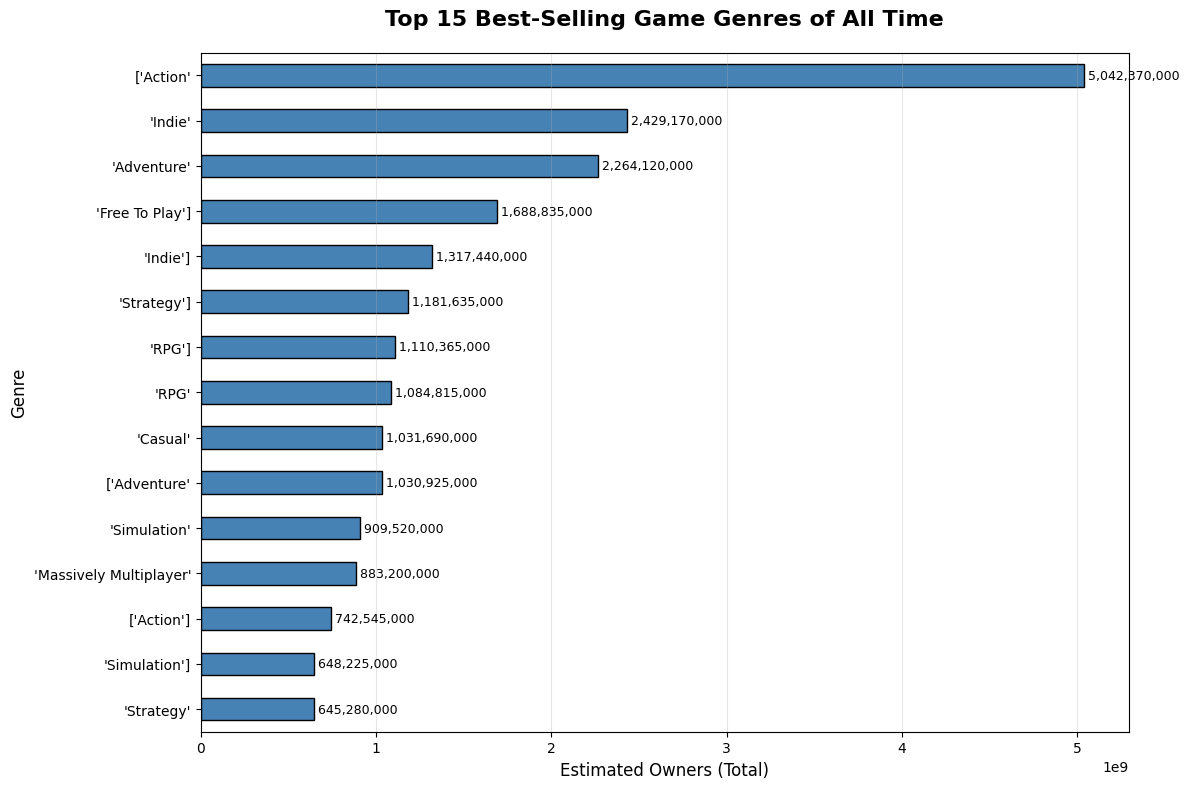


📊 Summary:
Total unique genres: 108
Top genre: ['Action' with 5,042,370,000 estimated owners
Games in top genre: 34,225
Average positive rating in top genre: 44.3%


In [46]:
# Best-selling Genres 

# Group and aggregate genre data (using avg_owners which has actual numeric values)
g = (df_exploded_genres
     .groupby('genre')
     .agg(num_games=('name','count'),
          sum_owners=('avg_owners','sum'),
          avg_pct_pos=('pct_pos_total','mean'))
     .sort_values('sum_owners', ascending=False)
     .head(15))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
g['sum_owners'].plot(kind='barh', ax=ax, color='steelblue', edgecolor='black')

# Formatting
ax.set_title("Top 15 Best-Selling Game Genres of All Time", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Estimated Owners (Total)", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(g['sum_owners']):
    ax.text(v, i, f' {v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig(fig_dir/"q1_top_genres_owners.png", dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n📊 Summary:")
print(f"Total unique genres: {df_exploded_genres['genre'].nunique()}")
print(f"Top genre: {g.index[0]} with {g['sum_owners'].iloc[0]:,.0f} estimated owners")
print(f"Games in top genre: {g['num_games'].iloc[0]:,}")
print(f"Average positive rating in top genre: {g['avg_pct_pos'].iloc[0]:.1f}%")